In [ ]:
!pip install SKompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

# 1. Modelleme

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis =1)

cart_model = DecisionTreeClassifier(random_state =1).fit(X,y)

In [ ]:
#Confusion matrix için y_pred:
y_pred = cart_model.predict(X)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
y_prob = cart_model.predict_proba(X)[:,1]
y_prob

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [ ]:
#AUC
roc_auc_score(y,y_prob)

1.0

# **-------------------------PATLADIK-------------------------** 

# 2. Holdout ile başarı değerlendirelim:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=17)

In [ ]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [ ]:
#Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:,1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [ ]:
#Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

Görüldüğü gibi model göremediği veride patladı. Overfit oldu. Ezbere kaçtı ayıp etti sonra böyle başka veriler görünce eli ayağı oynadı bütün değerler düştü.

In [ ]:
#Train setini baştan tekrar oluşturalım
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=45)
cart_model = DecisionTreeClassifier(random_state=45).fit(X_train, y_train)


In [ ]:
#Ben merak ettim random_state değişince trainde bir farklılık oldu mu diye?
#Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:,1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

Olmamış...

In [ ]:
#Test Hatalarına baştan tekrar bakıyoruz:
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       154
           1       0.53      0.49      0.51        77

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.68      0.68      0.68       231



0.6363636363636364

Random_state i değiştirmemiz çok da bir şey ifade etmedi iyileşmedi daha da kötüleşti. Biz de diyoruz ki bu böyle olmaz cross validate yöntemine bakalım.

# 3. CV ile başarı değerlendirme:


In [ ]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)#buradaki fit yazılmasa da olur. Zaten cv onu dikkate almayarak kendisi tekrardan fit edecektir.

In [ ]:
cv_result = cross_validate(cart_model,X,y,
                           cv=5,
                           scoring = [ "accuracy","f1","roc_auc"])
cv_result

{'fit_time': array([0.01704693, 0.00849104, 0.00769925, 0.00849771, 0.00762653]),
 'score_time': array([0.00810194, 0.00916672, 0.00981617, 0.01126456, 0.00911117]),
 'test_accuracy': array([0.69480519, 0.65584416, 0.66883117, 0.78431373, 0.7254902 ]),
 'test_f1': array([0.52525253, 0.56910569, 0.51428571, 0.66666667, 0.58      ]),
 'test_roc_auc': array([0.64574074, 0.65407407, 0.63      , 0.74632075, 0.68358491])}

In [ ]:
cv_result['test_accuracy'].mean()

0.7058568882098294

In [ ]:
cv_result['test_f1'].mean()

0.5710621194523633

In [ ]:
cv_result['test_roc_auc'].mean()

0.6719440950384347

CV ile elde ettiğimiz hatalar, başarılar daha güvenilir geliyor :) Her zamanki gibi.
Ama bu değerleri iyileştirebiliriz. Yok mu bi hiper parametrelerimizi gözden geçirmek? Var bu arada!

In [ ]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

Burada görülen **min_samples_split** = 2 yani 2 tane kalması durumuna göre bölme işlemine karar verebiliyor bu overfite neden olabilir. 
Aynı zamanda **max_depth** yani derinlik, bir ağacın derinliğinin ne şekilde olması gerektiğiyle alakalı.
Bunlar overfitin önüne geçebilecek parametreler. Bu durumları ele alalım ve :

In [ ]:
cart_params = {"max_depth": range(1,11),
               "min_samples_split": range(2,20)}

#Bu değerleri neye göre belirliyoruz? Ön tanımlı değerleri kontrol ederek buradan bir çıkarım yapabiliriz.
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   10.0s finished


In [ ]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [ ]:
#Yukarıdaki çıktıda görüleceği gibi max_depth = 5, min_samples_split = 4 bizim best parametrelerimizmiş.
#Biz de bu değerlere göre best score u görelim:
cart_best_grid.best_score_

0.7500806383159324

! NOT: Hangi score değerinin (f1,accuracy,auc) iyi olduğu best_score_ ve best_params_ noktalarını bulmak istersek de GridSearchCV içinde scoring="f1", scoring="auc" olarak belirterek de sonuçları bu değerlere göre alabiliriz.

In [ ]:
#Şimdi rastgele bir gözlem seçelim :
random = X.sample(1, random_state = 45)
random

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.4,0.395,29


In [ ]:
cart_best_grid.predict(random)

array([1])

!NOT : GridSearchCV içerisinde en iyi kombinasyona ait modeli tutar, bu model kullanılarak modelleme yapılabilir ancak yine de en iyi parametreler ile bir model kurmak gerekiyor olabilir. Ayrıca bazı işlemlerde bu modelin bazı dezavantajları bulunmaktadır.

#4. Final Model

In [ ]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X,y)

In [ ]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
#Yukarıdaki işemin bir diğer yolu ise :
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [ ]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
cv_results= cross_validate(cart_final,
                           X,y,
                           cv=5,
                            scoring = [ "accuracy","f1","roc_auc"])

In [ ]:
cv_results['test_accuracy'].mean()
#Bir önceki test_accuracy değerimiz 0.7058568882098294

0.7500806383159324

In [ ]:
cv_results['test_f1'].mean()
#Bir önceki test_f1 değerimiz 0.5710621194523633

0.614625004082526

In [ ]:
cv_results['test_roc_auc'].mean()
#Bir önceki test_roc_auc değerimiz 0.6719440950384347

0.797796645702306

Görüldüğü üzere bir önceki haline göre başarılarımızı arttırdık. Hatalarımızı düşürdük.

# 5. Feature Importance

In [ ]:
#Değişkenlerin önem düzeylerine bakalım :
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

Ama buradan pek de bir şey anlamıyoruz. Tamam önemliler de ne bunlar kim önemli?

In [ ]:
#Önemli değişkenleri daha iyi gözlemleyebilmek adına:
def plot_importance(model,features,num=len(X),save=False):
  feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature":features.columns})
  plt.figure(figsize=(10,10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                   ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")

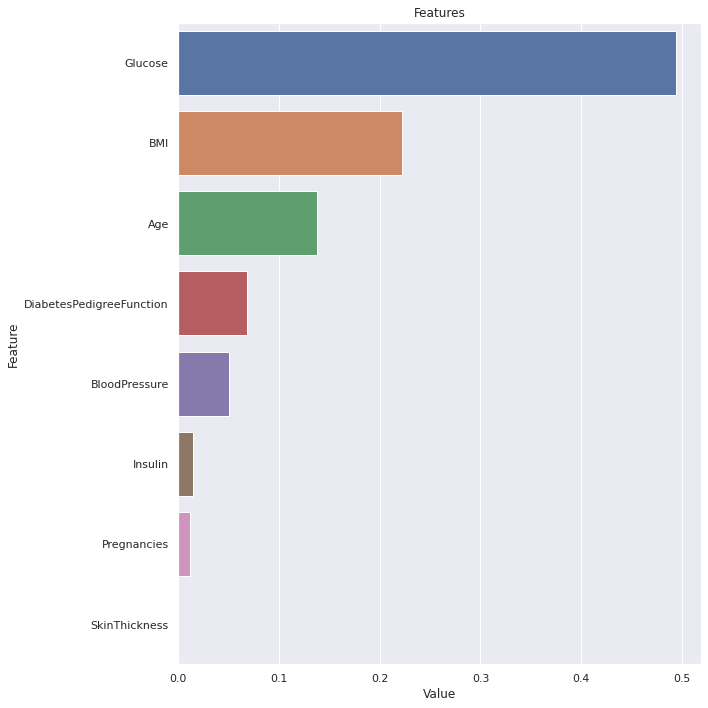

In [ ]:
plot_importance(cart_final, X)

#6. Analyzing Model Complexity with Learning Curves (BONUS)

In [ ]:
#Model karmaşıklığı modelden modele farklılık gösteriyorolabilir.
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1,11),
                                           scoring="roc_auc",
                                           cv=5)

#Bu işlemle cart_final modeliyle X bağımlı değişkeni ve y bağımsız değişkeni alındı,
# max_depth için 1-11 değerlendirmeleri yapıldı ve bunların test_score ve train_score ları kaydedildi.
# 10 tane deneme parametremiz var (param_range), her deneme değeri için 5 tane çapraz doğrulama yapılacak.(cv)
# Buradaki bir array bir parametre değerine karşılık elde edilen hataları ifade ediyor.
# Arraylarin içi de kaç tane cross validation varsa onu ifade ediyor. (cv=5)
train_score, test_score

(array([[0.73253505, 0.69223131, 0.71232477, 0.65764535, 0.71200581],
        [0.80581192, 0.78356308, 0.79807243, 0.76099419, 0.80418023],
        [0.84599299, 0.8404264 , 0.83589953, 0.80871512, 0.85089535],
        [0.87873832, 0.88042056, 0.88091121, 0.85968605, 0.88578488],
        [0.91303738, 0.90725467, 0.91617991, 0.89705814, 0.91373837],
        [0.94301986, 0.94181659, 0.943125  , 0.91934302, 0.93837791],
        [0.96739486, 0.96415304, 0.96676402, 0.93493023, 0.96244186],
        [0.98292056, 0.97774533, 0.98331192, 0.95220349, 0.98444186],
        [0.99254089, 0.98566589, 0.99387266, 0.96551163, 0.99315116],
        [0.99503505, 0.9884229 , 0.99603388, 0.97868023, 0.99655814]]),
 array([[0.64851852, 0.65648148, 0.68203704, 0.66367925, 0.73018868],
        [0.74074074, 0.69064815, 0.72212963, 0.77075472, 0.76122642],
        [0.7887963 , 0.71222222, 0.77453704, 0.80018868, 0.77679245],
        [0.7912963 , 0.73      , 0.78611111, 0.84216981, 0.78924528],
        [0.8153703

In [ ]:
# Burada bir score elde etmek istersek : train setinin ve test setinin ortalamasını almak durumundayız.
mean_train_score = np.mean(train_score, axis=1)
mean_train_score

array([0.70134846, 0.79052437, 0.83638588, 0.8771082 , 0.90945369,
       0.93713648, 0.9591368 , 0.97612463, 0.98614845, 0.99094604])

In [ ]:
#Her bir parametre için (params=1-11 arası yani 10 tane) hata değeri elde etmiş oluruz.
mean_test_score = np.mean(test_score, axis=1)
mean_test_score

array([0.67618099, 0.73709993, 0.77050734, 0.7877645 , 0.79779665,
       0.7654109 , 0.75568029, 0.74123061, 0.70568204, 0.71118728])

NOT : Validasyon = Test

In [ ]:
# Bu değerleri görselleştirmek istersek bir fonksiyon yazalım:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
  train_score, test_score = validation_curve(model, X = X, y = y,
                                           param_name = param_name,
                                           param_range = param_range,
                                           scoring=scoring,
                                           cv = cv)
  mean_train_score = np.mean(train_score, axis=1)
  mean_test_score = np.mean(test_score, axis=1)

  plt.plot(param_range, mean_train_score,
           label="Training Score", color="b")
  
  plt.plot(param_range, mean_test_score,
           label="Validation Score", color="r")
  
  plt.title(f"Validation Curve for{type(model).__name__}")
  plt.xlabel(f"Number of {param_name}")
  plt.ylabel(f"{scoring}")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show(block=True)

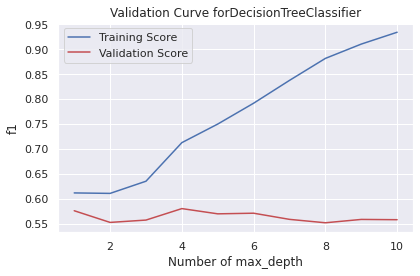

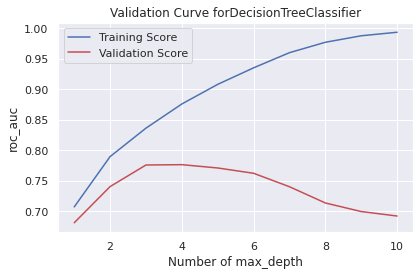

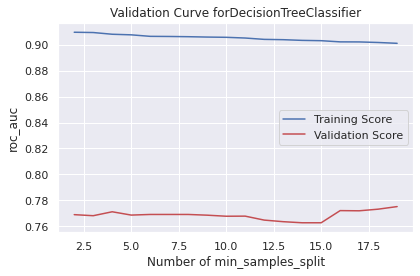

In [ ]:
val_curve_params(cart_final, X, y, "max_depth", range(1,11), scoring="f1")
cart_val_params =[["max_depth", range(1,11)], ["min_samples_split", range(2,20)]]
for i in range(len(cart_val_params)):
  val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

# Görselleştirme (Visulization)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
def tree_graph(model, col_names, file_name):
  tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
  graph = pydotplus.graph_from_dot_data(tree_str)
  graph.write_png(file_name)

In [ ]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

In [ ]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

#Karar Kuralları

In [ ]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

# Karar Kurallarının Python Kodlarını Çıkarma

In [ ]:
!pip install update scikit-learn==0.23.1

In [ ]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [ ]:
# Python kodlarını çıkarabilmek için:
print(skompile(cart_final.predict).to("python/code"))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [ ]:
# Sql kodlarını çıkarabilmek için :
print(skompile(cart_model.predict).to("sqlalchemy/sqlite"))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [ ]:
# Excel kodlarını çıkarabilmek için :
print(skompile(cart_model.predict).to("excel"))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


#Python Kodları İle Tahmin İşleri

In [ ]:
def predict_with_rules(x):
  return (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
#Fonksiyon olarak tanımladık ve random bir veriyle deneyelim :
x = [12,20,33,2,33,65,43,38]
predict_with_rules(x)

1

#Modeli Kaydetme Ve Çağırma

In [ ]:
#Model Kaydetme
joblib.dump(cart_final, "cart_final.pkl") 

['cart_final.pkl']

In [ ]:
#Modeli diskten okuyalım:
cart_model_from_disc = joblib.load("cart_final.pkl")

In [ ]:
#Yeni bir gözlem birimi oluşturalım:
x = [12,34,22,98,56,3,27,9]
#predict fonksiyonunu kullandığımızdan dolayı x i dataframe e dönüştürmeliyiz.
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1])

! NOT: Basit çözümler, veri tabanlarına yakın çözümler her zaman tercih edilir.